In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [22]:
bench_mark_df = pd.read_csv('analyse.csv')
bench_mark_df = bench_mark_df.T
bench_mark_df.columns = bench_mark_df.loc['Name']
bench_mark_df = bench_mark_df.drop(['Name'])
bench_mark_df 

Name,"compute_lab_image(std::byte*, std::byte*, int, int, int)",[CUDA memcpy HtoD],[CUDA memcpy DtoH],"opening(std::byte*, int, int, int, int)","hysterisis_compute(std::byte*, int, int, int, int, int)","hysterisis_mark(std::byte*, int, int, int)","mask(std::byte*, std::byte*, int, int, int, float)",ConvertNV12BLtoNV12,"update_background(std::byte*, std::byte*, int, int)",[CUDA memset],MemsetD2D_BL
Type,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities
Time(%),91.203377,5.017589,2.600218,0.468514,0.241643,0.205467,0.132356,0.11065,0.011007,0.007914,0.001264
Time,2.076442,0.114236,0.0592,0.010667,0.005502,0.004678,0.003013,0.002519,0.000251,0.00018,0.000029
Calls,400,1200,1213,400,400,400,400,400,13,64,10
Avg,5.191104,0.095196,0.048804,0.026666,0.013753,0.011694,0.007533,0.006297,0.019276,0.002815,0.002876
Min,5.100671,0.087326,0.01568,0.025151,0.007296,0.010591,0.006144,0.00512,0.018719,0.000608,0.002464
Max,6.77168,0.130429,0.12451,0.038047,0.024447,0.021664,0.023295,0.016096,0.021088,0.003264,0.003584


In [23]:
function_regex = re.compile(r'([\w_]+)\(')
function_column = []
for col in bench_mark_df.columns:
    matches = function_regex.findall(col)
    if len(matches) > 0:
        function_column.append(matches[0])
        bench_mark_df.rename(columns={col: matches[0]}, inplace=True)
bench_mark_df[function_column] 


Name,compute_lab_image,opening,hysterisis_compute,hysterisis_mark,mask,update_background
Type,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities,GPU activities
Time(%),91.203377,0.468514,0.241643,0.205467,0.132356,0.011007
Time,2.076442,0.010667,0.005502,0.004678,0.003013,0.000251
Calls,400,400,400,400,400,13
Avg,5.191104,0.026666,0.013753,0.011694,0.007533,0.019276
Min,5.100671,0.025151,0.007296,0.010591,0.006144,0.018719
Max,6.77168,0.038047,0.024447,0.021664,0.023295,0.021088


In [27]:
df = bench_mark_df[function_column]
df.loc['Type']
df = df.drop(['Type'])
df = df.astype(float)
df

Name,compute_lab_image,opening,hysterisis_compute,hysterisis_mark,mask,update_background
Time(%),91.203377,0.468514,0.241643,0.205467,0.132356,0.011007
Time,2.076442,0.010667,0.005502,0.004678,0.003013,0.000251
Calls,400.000000,400.000000,400.000000,400.000000,400.000000,13.000000
Avg,5.191104,0.026666,0.013753,0.011694,0.007533,0.019276
Min,5.100671,0.025151,0.007296,0.010591,0.006144,0.018719
Max,6.771680,0.038047,0.024447,0.021664,0.023295,0.021088


In [39]:
%%file bench_mark.py
import pandas as pd
import numpy as np
import re
import argparse
import os
parser = argparse.ArgumentParser(description='Process some integers.')
parser.add_argument('--file', type=str, default='analyse.csv',
                    help='file name')
parser.add_argument('--output-file', type=str, default='analyse.csv',
                    help='output file name')
csv_file = parser.parse_args().file
output_file = parser.parse_args().output_file

if csv_file is None:
    csv_file = 'analyse.csv'
if output_file is None:
    output_file = 'clean_benchmark.csv'
    
if not os.path.exists(csv_file):
    print('File not found')
    exit(1)

def generate_clean_benchmark(csv_file):
    bench_mark_df = pd.read_csv(csv_file)
    bench_mark_df = bench_mark_df.T
    bench_mark_df.columns = bench_mark_df.loc['Name']
    bench_mark_df = bench_mark_df.drop(['Name'])
    function_regex = re.compile(r'([\w_]+)\(')
    function_column = []
    for col in bench_mark_df.columns:
        matches = function_regex.findall(col)
        if len(matches) > 0:
            function_column.append(matches[0])
            bench_mark_df.rename(columns={col: matches[0]}, inplace=True)
    bench_mark_df[function_column] 
    df = bench_mark_df[function_column]
    df.loc['Type']
    df = df.drop(['Type'])
    df = df.astype(float)
    df.to_csv('clean_benchmark.csv')
    return df

generate_clean_benchmark(csv_file)

Overwriting bench_mark.py


In [39]:
def generate_clean_benchmark(csv_file):
    bench_mark_df = pd.read_csv(csv_file)
    bench_mark_df = bench_mark_df.T
    bench_mark_df.columns = bench_mark_df.loc['Name']
    bench_mark_df = bench_mark_df.drop(['Name'])
    function_regex = re.compile(r'([\w_]+)\(')
    function_column = []
    for col in bench_mark_df.columns:
        matches = function_regex.findall(col)
        if len(matches) > 0:
            function_column.append(matches[0])
            bench_mark_df.rename(columns={col: matches[0]}, inplace=True)
    bench_mark_df[function_column] 
    df = bench_mark_df[function_column]
    df.loc['Type']
    df = df.drop(['Type'])
    df = df.astype(float)
    df.to_csv('clean_benchmark.csv')
    return df

df = generate_clean_benchmark('analyse.csv')

In [44]:
df


Name,compute_lab_image,opening,hysterisis_compute,hysterisis_mark,mask,update_background
Time(%),91.500156,0.472858,0.247085,0.209456,0.131270,0.011218
Time,2.090058,0.010801,0.005644,0.004784,0.002998,0.000256
Calls,400.000000,400.000000,400.000000,400.000000,400.000000,13.000000
Avg,5.225144,0.027002,0.014109,0.011961,0.007496,0.019711
Min,5.138886,0.025600,0.007392,0.010783,0.006208,0.018399
Max,6.777032,0.041087,0.023552,0.020768,0.016031,0.023584


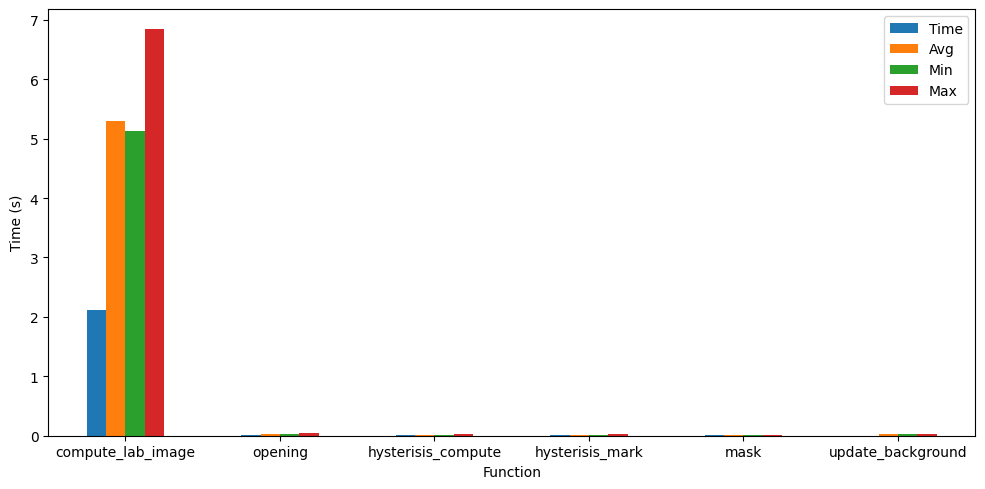

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
transposed_df = (df.drop(['Calls','Time(%)']).T)

transposed_df.plot(ax=ax, kind='bar',  rot=0)
ax.set_ylabel('Time (s)')
ax.set_xlabel('Function')
fig.tight_layout()
fig.savefig('benchmark1.png')

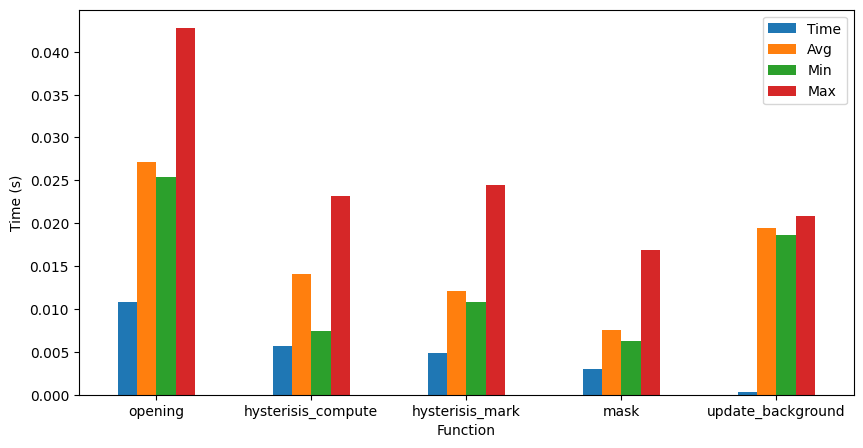

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
transposed_df = (df.drop(['Calls','Time(%)']).T)

transposed_df.drop(['compute_lab_image']).plot(ax=ax, kind='bar',  rot=0)
ax.set_ylabel('Time (s)')
ax.set_xlabel('Function')
fig.savefig('benchmark.png')